# Bike Rental 

In [2]:
rm(list = ls())


In [3]:
library(purrr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)
library(rpart)
library(MASS)
library(DMwR)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
bike_rental = read.csv("../input/bikerental/day.csv")


In [5]:
head(bike_rental)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [6]:
dim(bike_rental)

[1] 731  16

In [7]:
str(bike_rental)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


In [8]:
dim(bike_rental)

[1] 731  16

In [9]:
summary(bike_rental)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

# Pre-Processing

        Removing the instant variable, as it is index in datasets
        Removing date variable as we have to predict count on seasonal basis not date basis-


In [10]:
bike_rental= subset(bike_rental,select=-(instant))
bike_rental= subset(bike_rental,select=-(dteday))

In [11]:
names(bike_rental)

[1] "season"     "yr"         "mnth"       "holiday"    "weekday"   
 [6] "workingday" "weathersit" "temp"       "atemp"      "hum"       
[11] "windspeed"  "casual"     "registered" "cnt"

In [12]:
names(bike_rental)[names(bike_rental) == "yr"] <- "year"
names(bike_rental)[names(bike_rental) == "mnth"] <- "month"
names(bike_rental)[names(bike_rental) == "hum"] <- "humidity"
names(bike_rental)[names(bike_rental) == "cnt"] <- "count"

In [13]:
head(bike_rental)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


   ### Missing values

In [14]:
sum(is.na(bike_rental))

[1] 0

    Changing data types of variable

In [15]:
bike_rental[,1:7]= lapply (bike_rental[, 1:7], as.factor)
bike_rental[,8:14]= lapply (bike_rental[, 8:14], as.numeric)

# EDA

In [16]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

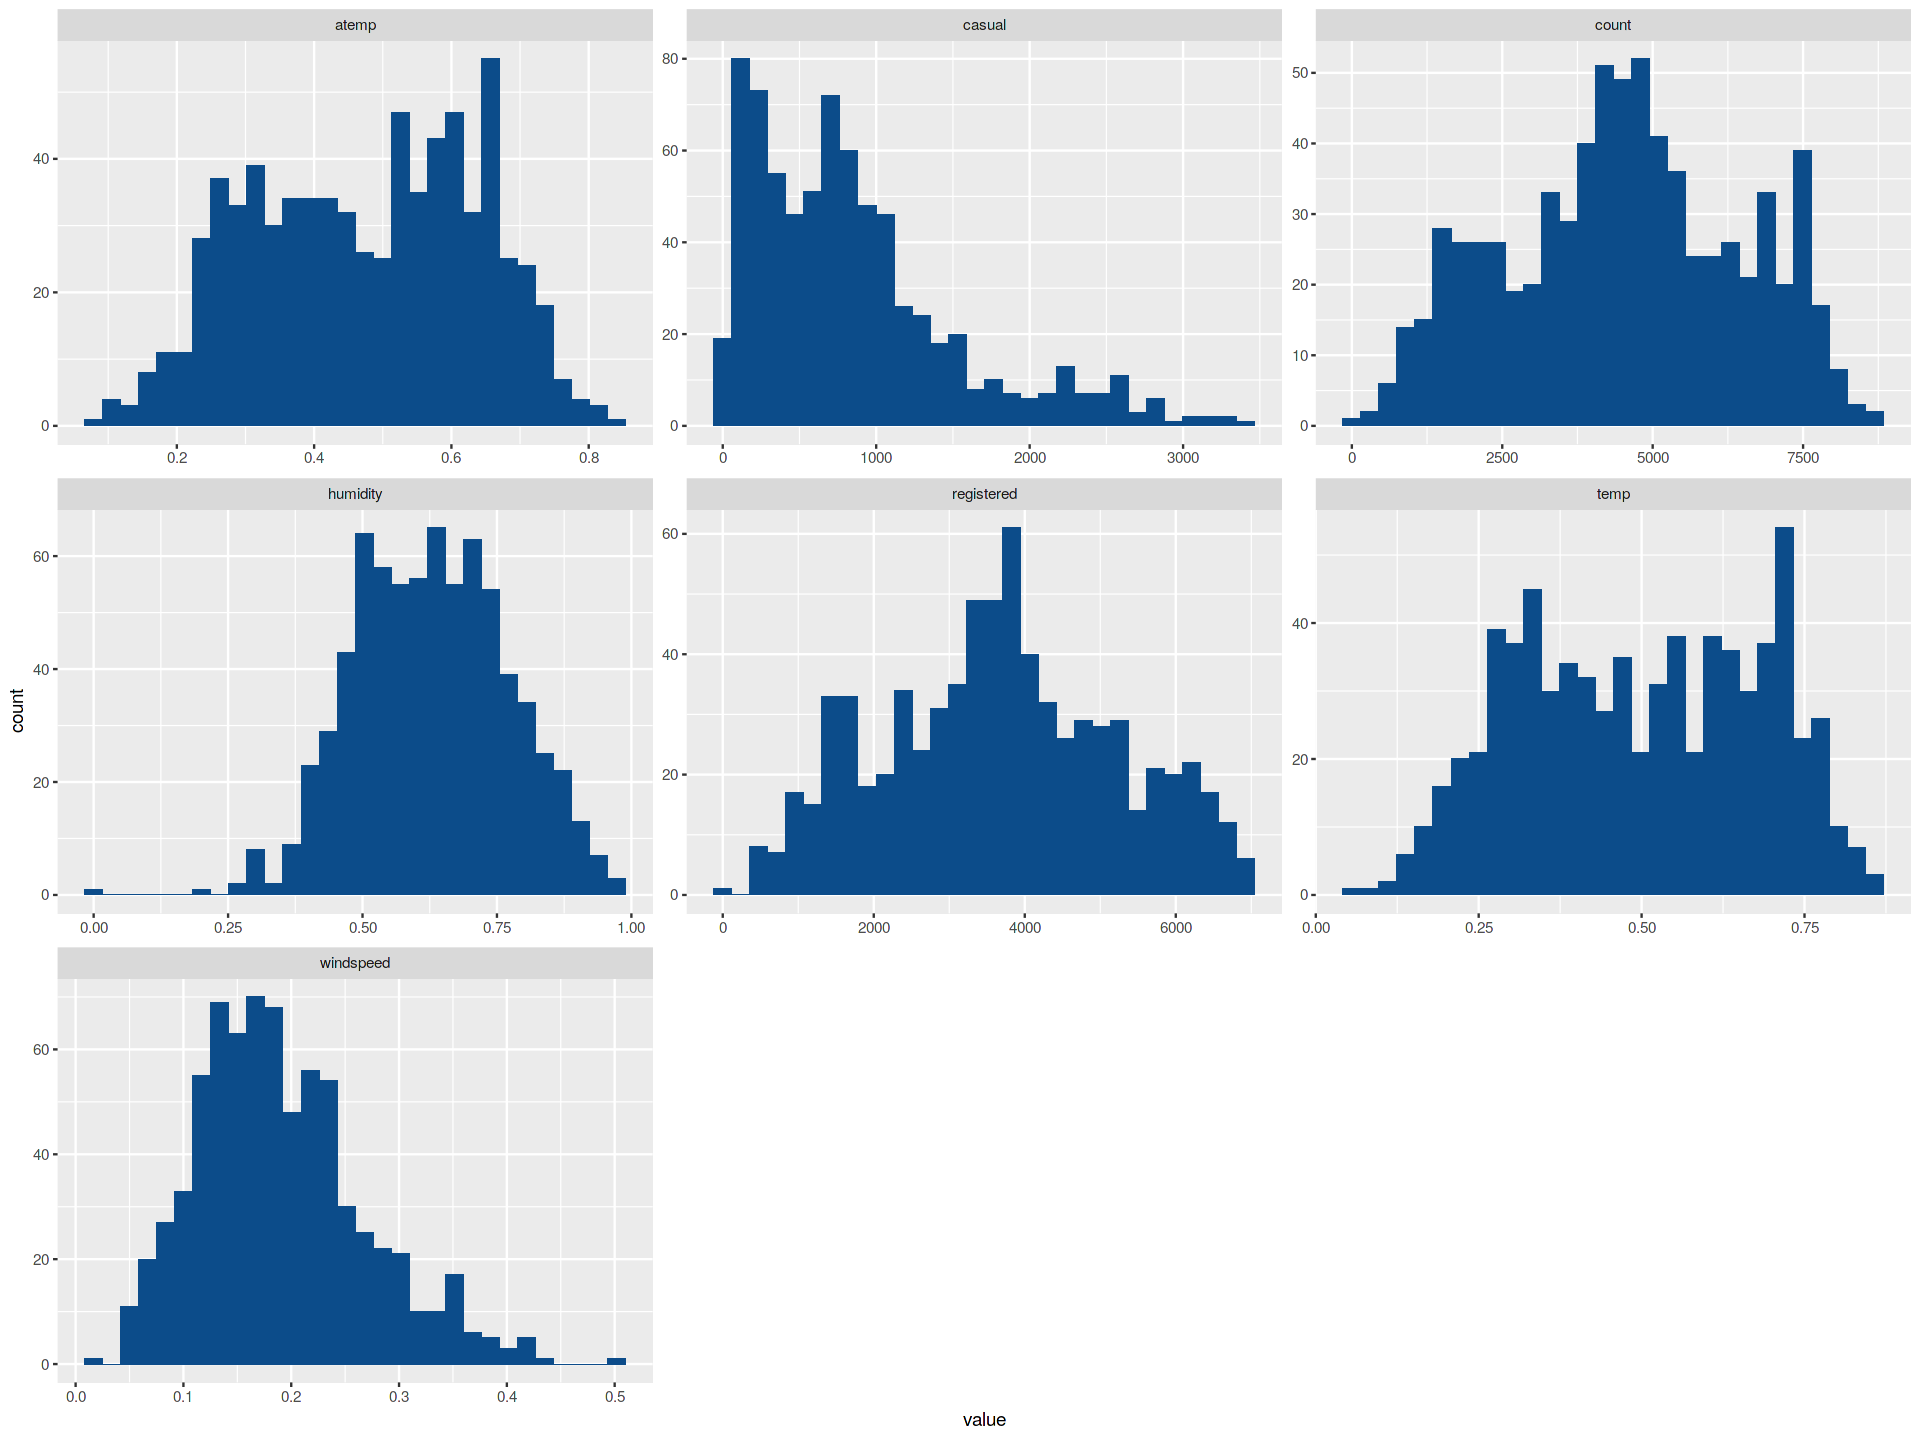

In [17]:
fig(16,12)
bike_rental %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram(bins = 30L, fill = "#0c4c8a")

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


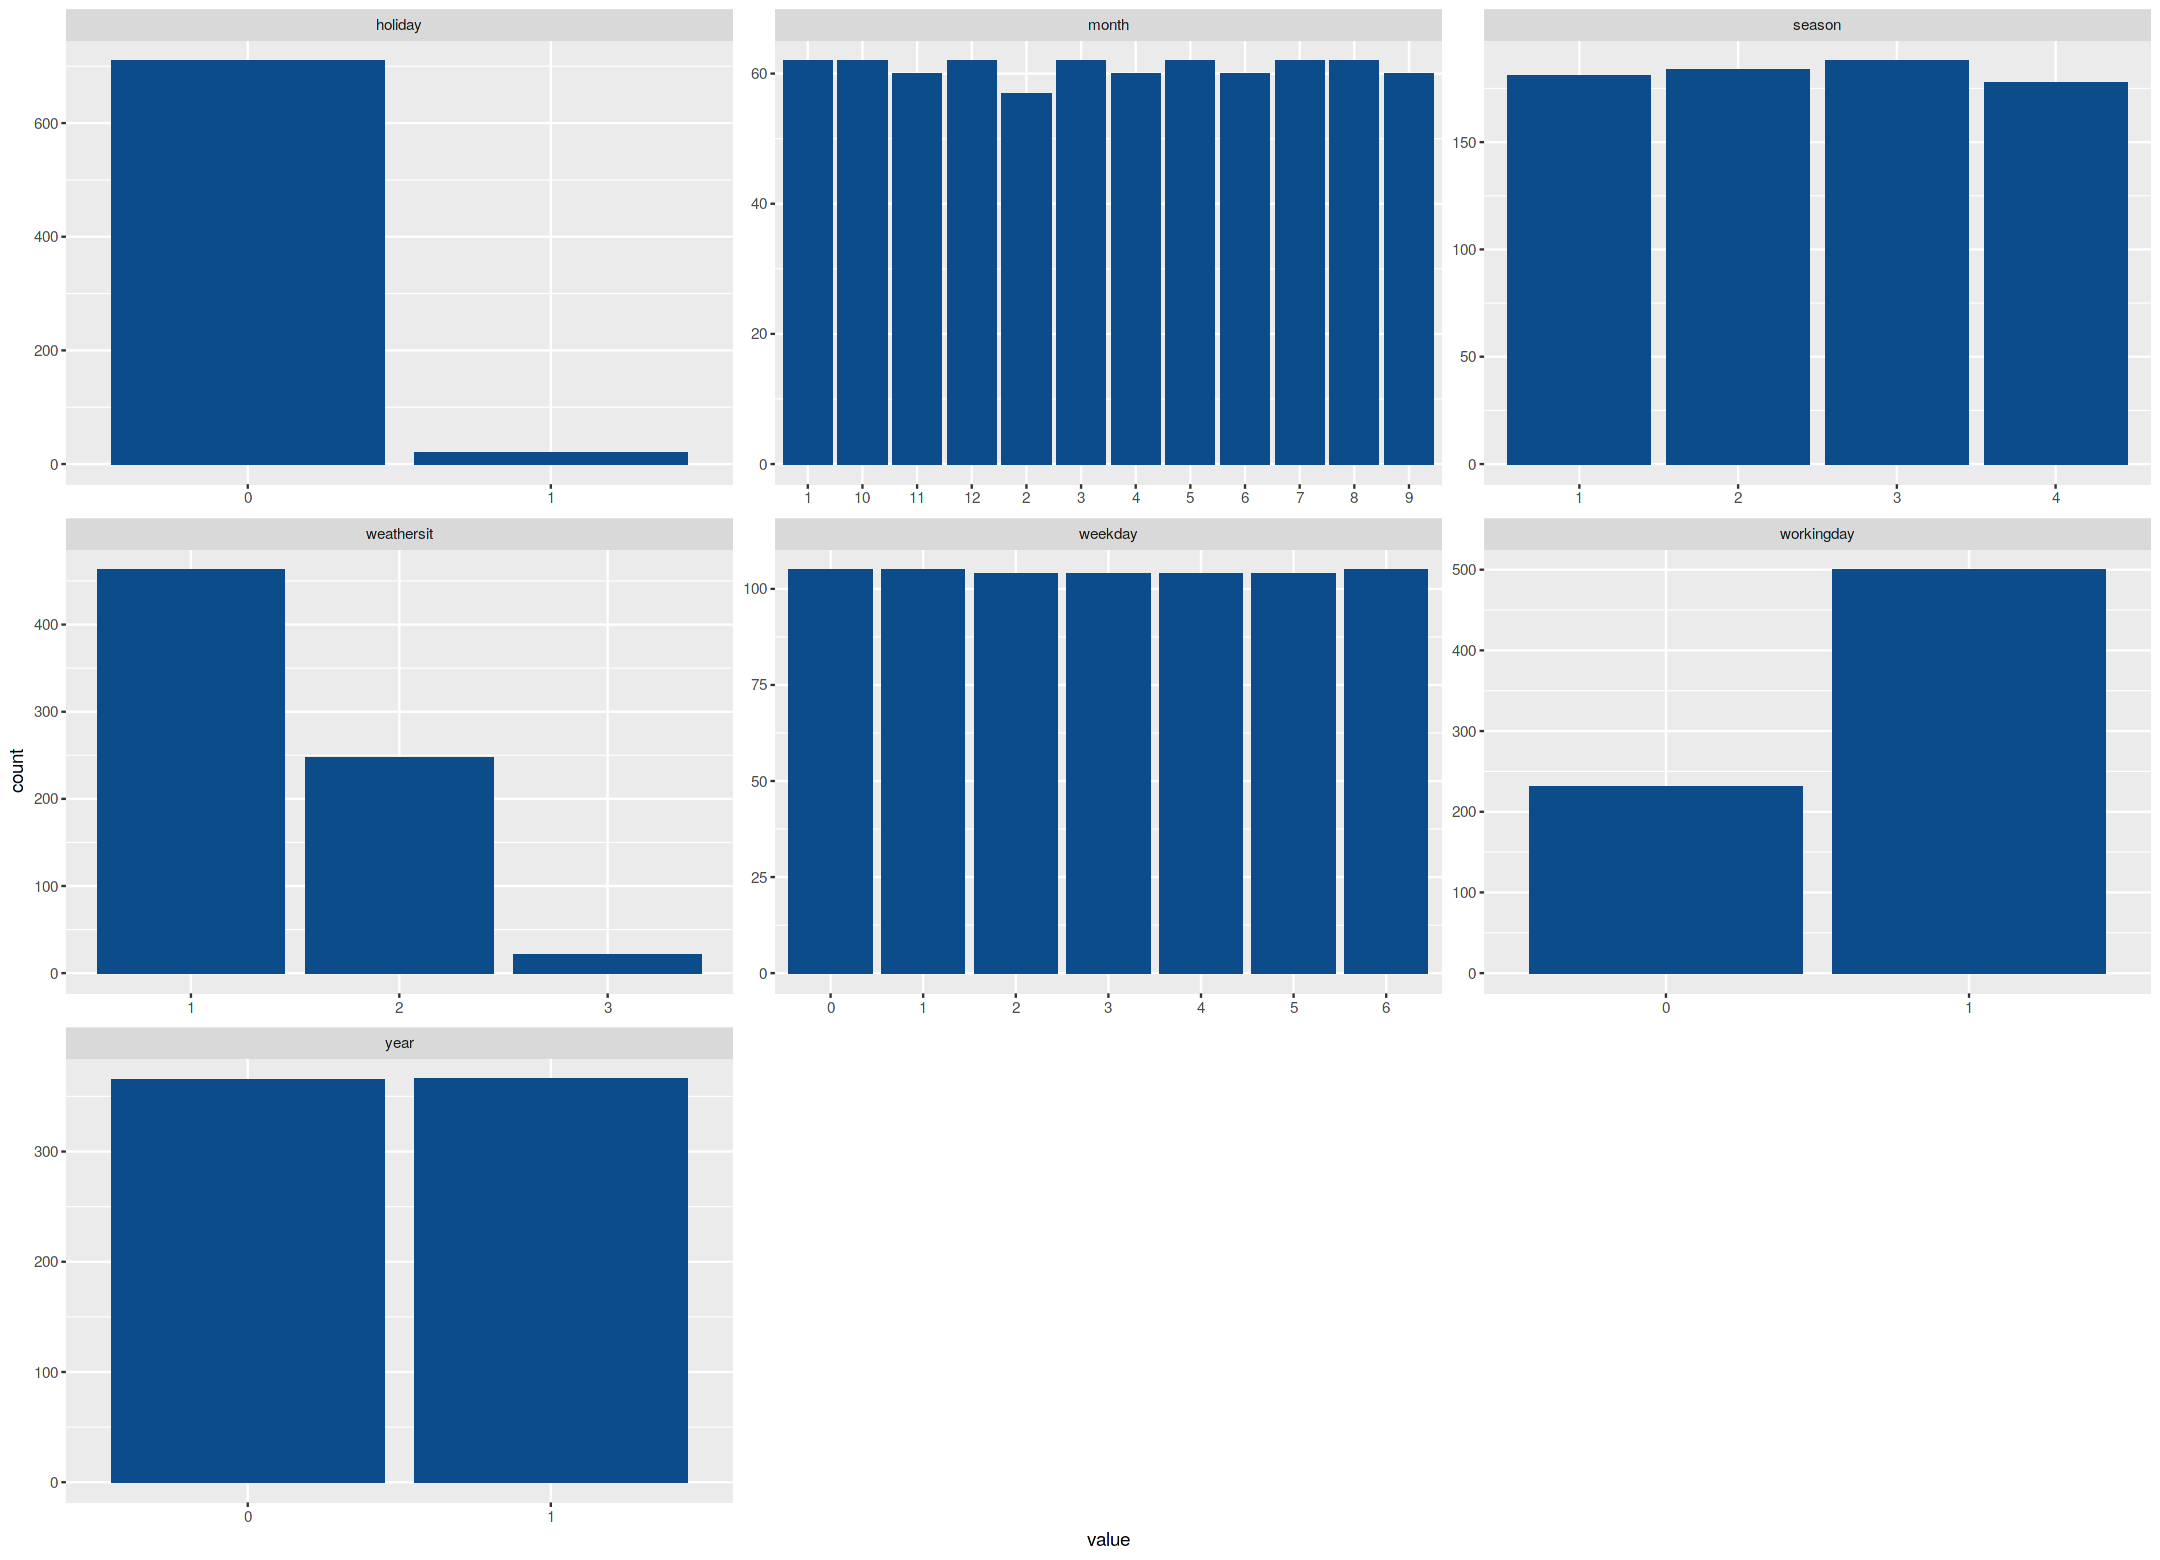

In [18]:
fig(18,13)
bike_rental %>%
  keep(is.factor) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_bar( fill = "#0c4c8a")

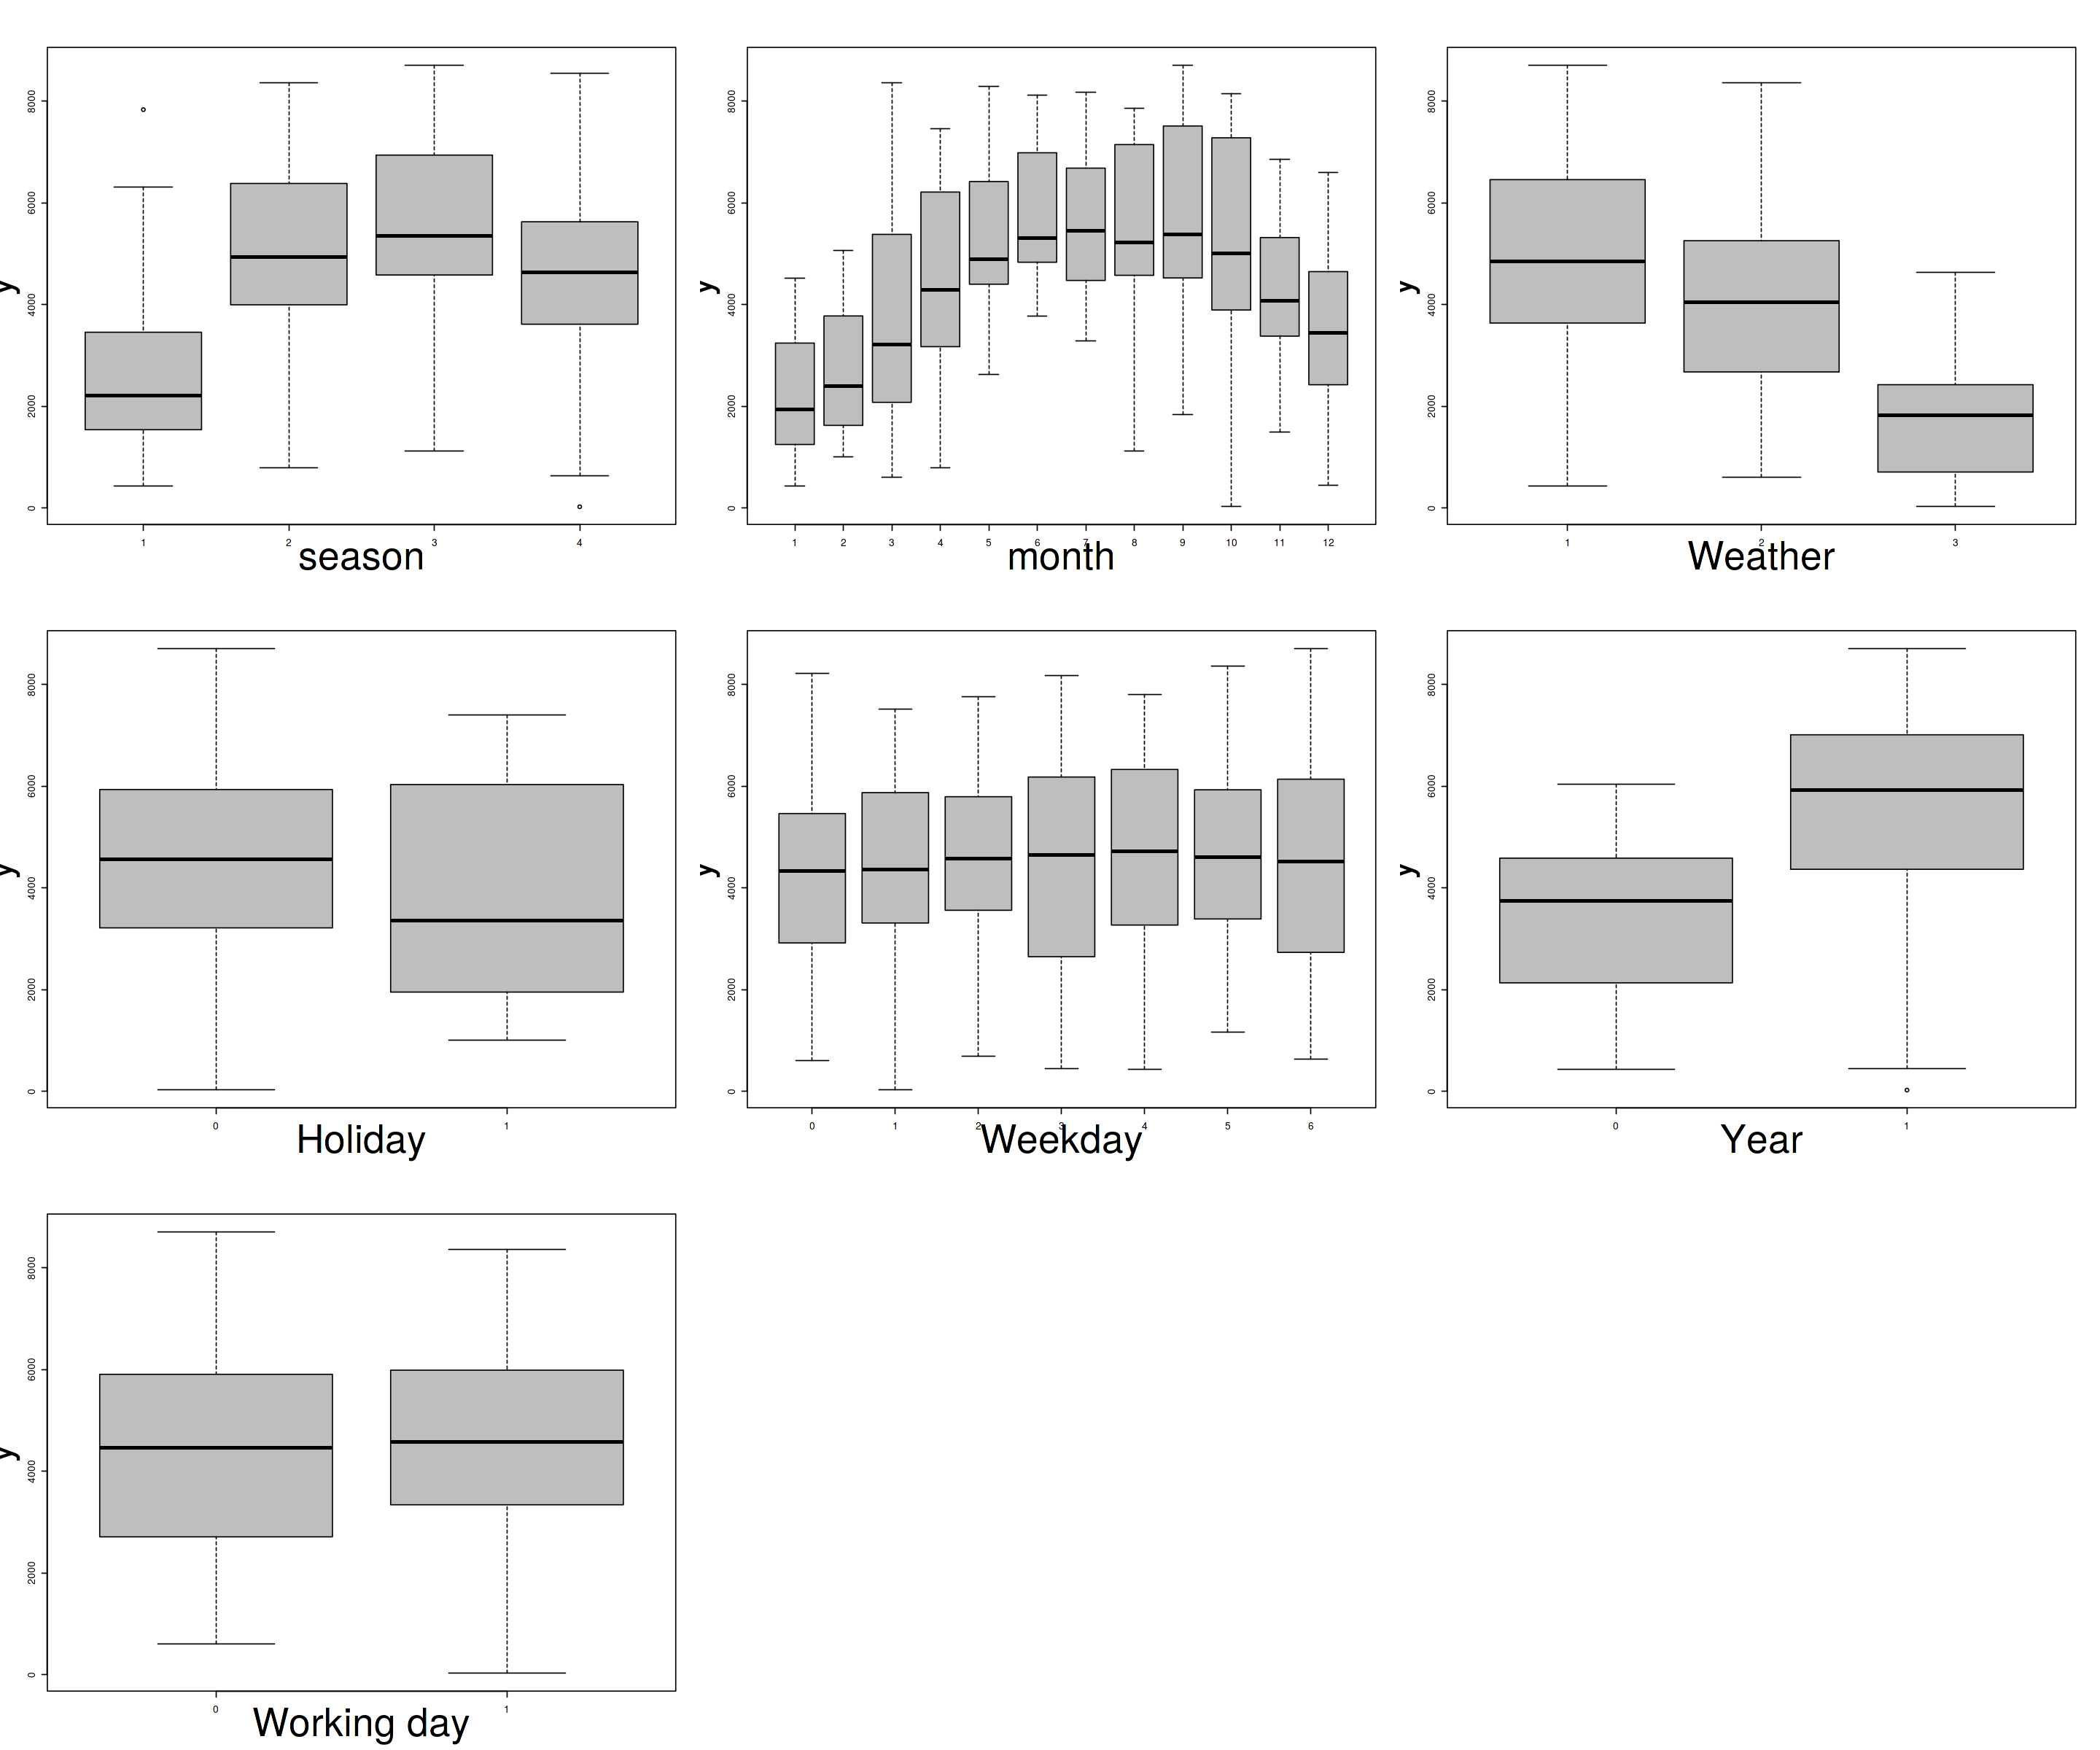

In [19]:
fig(24,20)
par(mfrow=c(3,3))

plot(x = bike_rental$season, y = bike_rental$count,cex.lab=4, xlab = "season",col = "grey")
plot(x = bike_rental$month, y = bike_rental$count,cex.lab=4, xlab = "month",col = "grey")
plot(x = bike_rental$weathersit, y = bike_rental$count,cex.lab=4, xlab = "Weather",col = "grey")
plot(x = bike_rental$holiday, y = bike_rental$count,cex.lab=4, xlab = "Holiday",col = "grey")
plot(x = bike_rental$weekday, y = bike_rental$count,cex.lab=4, xlab = "Weekday",col = "grey")
plot(x = bike_rental$year, y = bike_rental$count,cex.lab=4, xlab = "Year",col = "grey")
plot(x = bike_rental$workingday, y = bike_rental$count,cex.lab=4, xlab = "Working day",col = "grey")
#Double Click to magnify

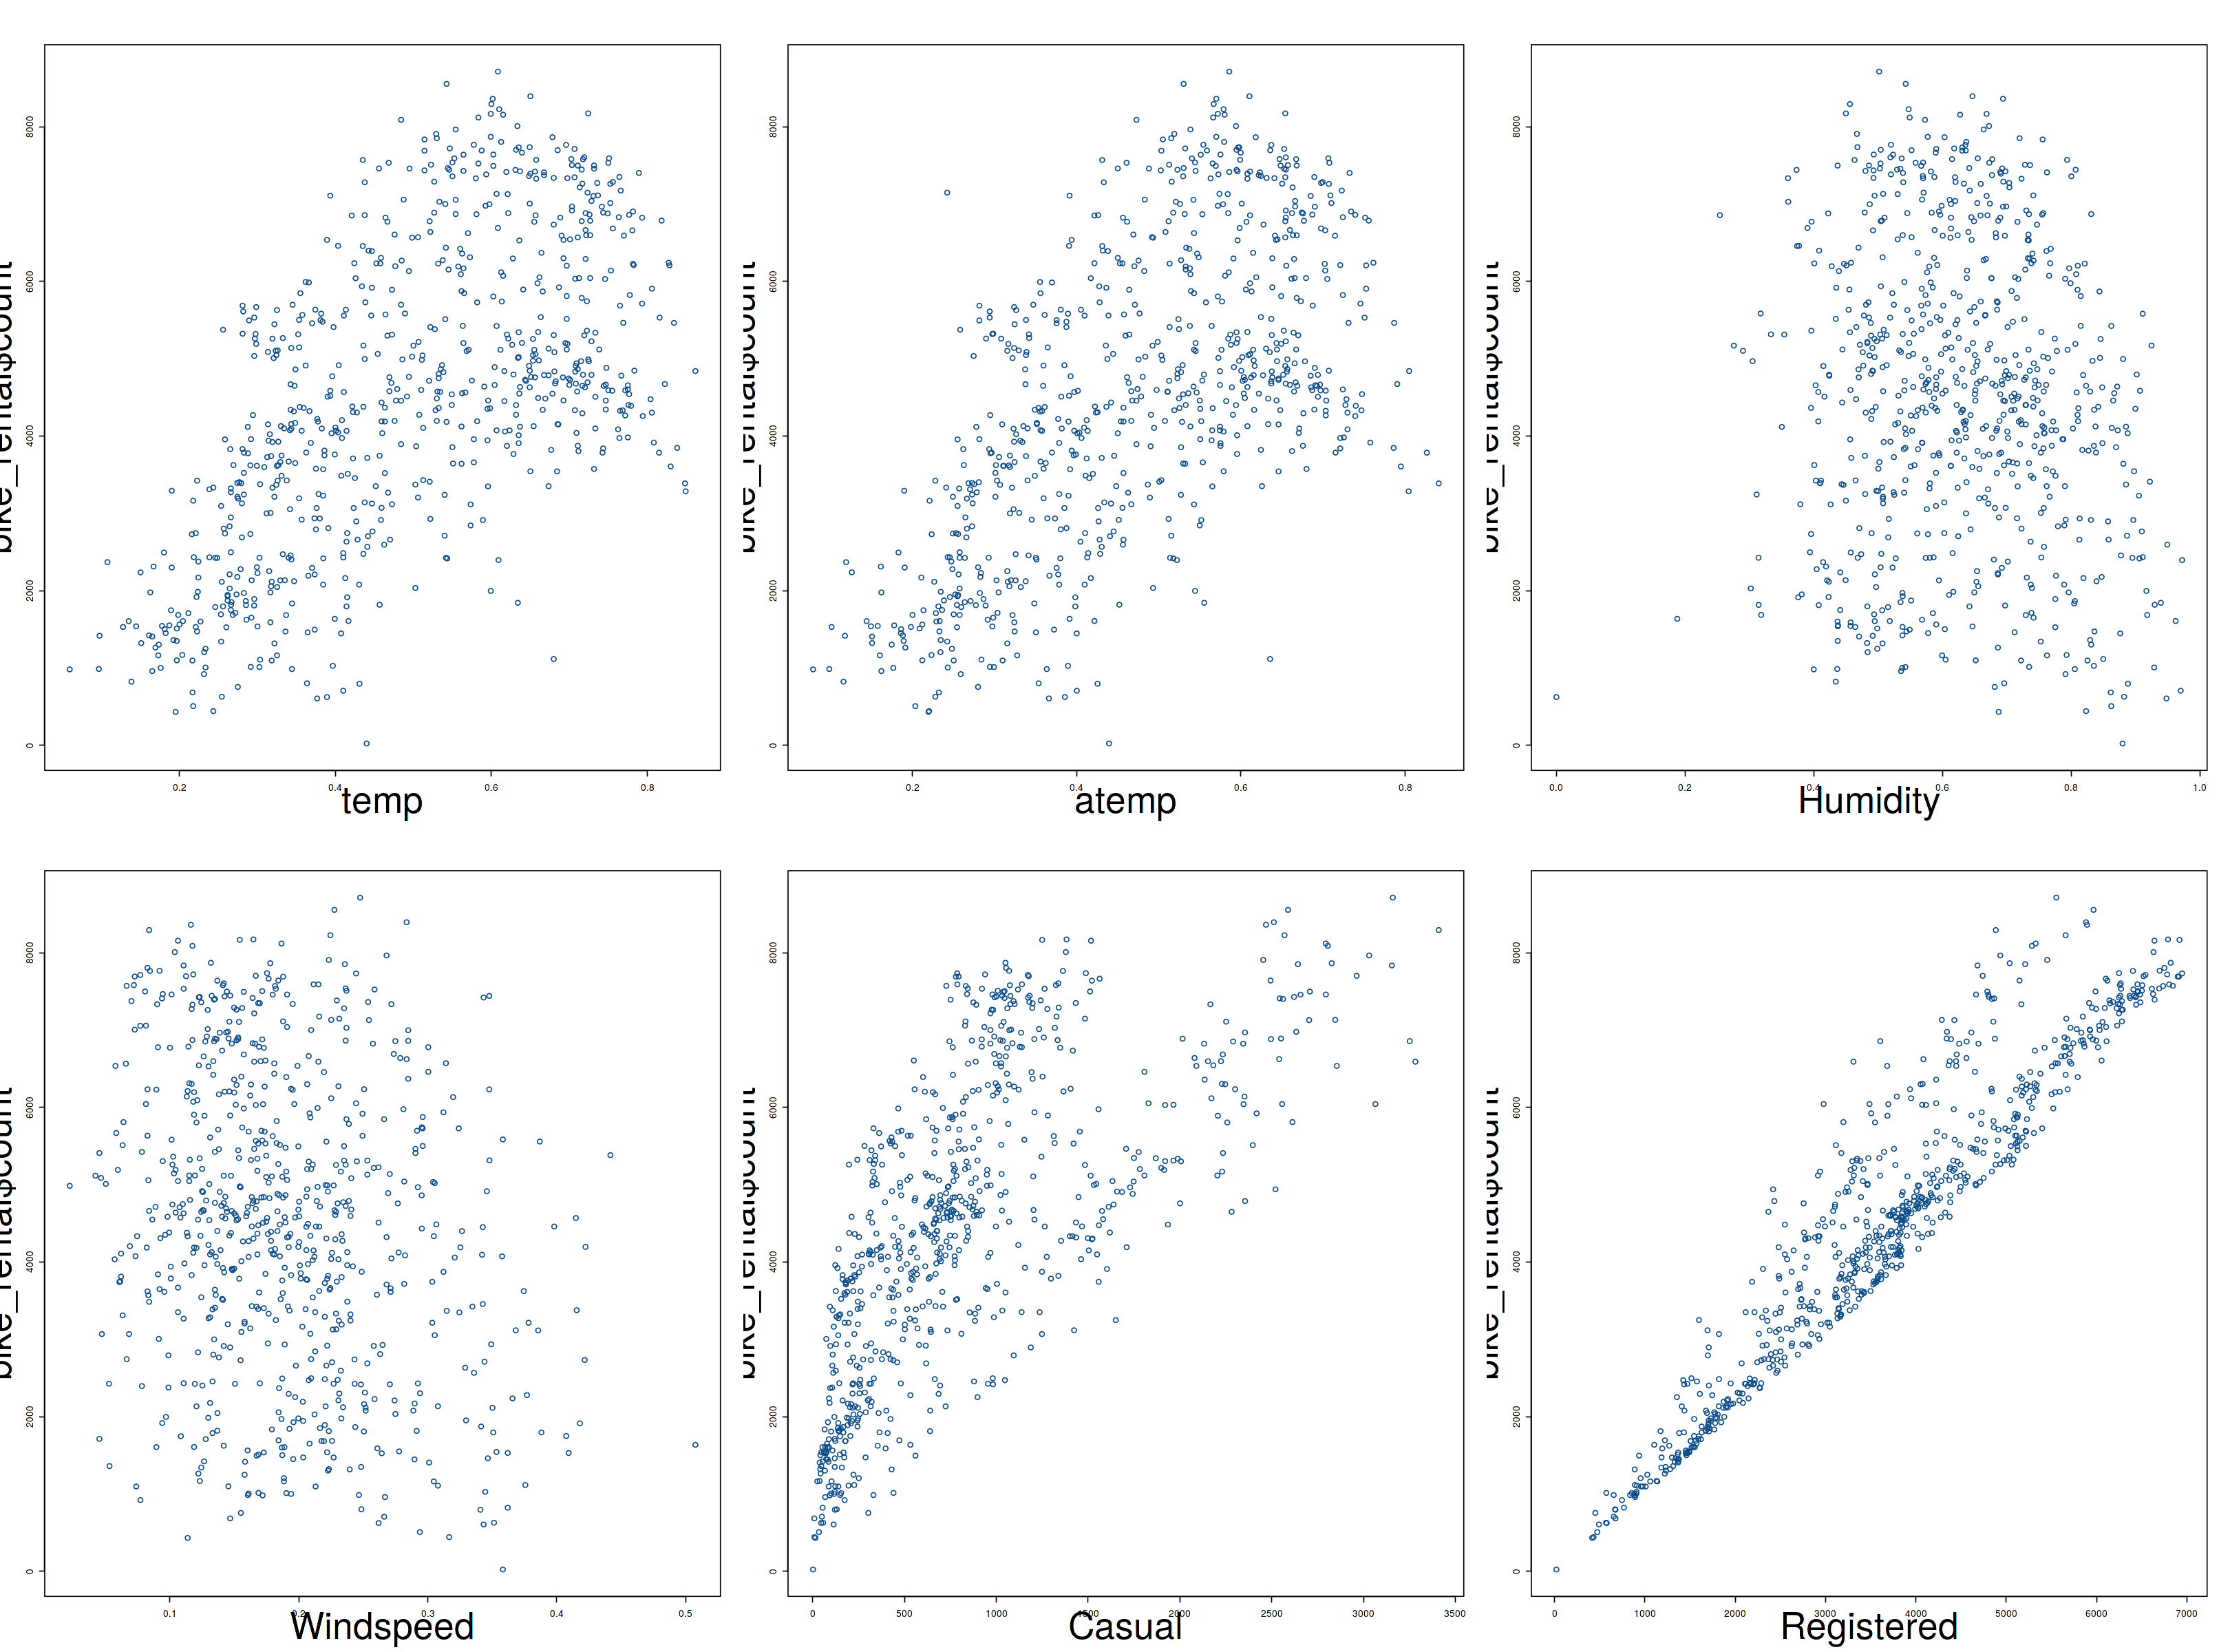

In [20]:
fig(27,20)
par(mfrow=c(2,3))

plot(x = bike_rental$temp, y = bike_rental$count,cex.lab=4, xlab = "temp",col = "#0c4c8a")
plot(x = bike_rental$atemp, y = bike_rental$count,cex.lab=4, xlab = "atemp",col = "#0c4c8a")
plot(x = bike_rental$humidity, y = bike_rental$count, cex.lab=4 , xlab="Humidity",col = "#0c4c8a")
plot(x = bike_rental$windspeed, y = bike_rental$count, cex.lab=4, xlab = "Windspeed",col = "#0c4c8a")
plot(x = bike_rental$casual, y = bike_rental$count, cex.lab=4, xlab = "Casual",col = "#0c4c8a")
plot(x = bike_rental$registered, y = bike_rental$count, cex.lab=4, xlab = "Registered",col = "#0c4c8a")


# Outliers

Warning message:
“Ignoring unknown parameters: bins”


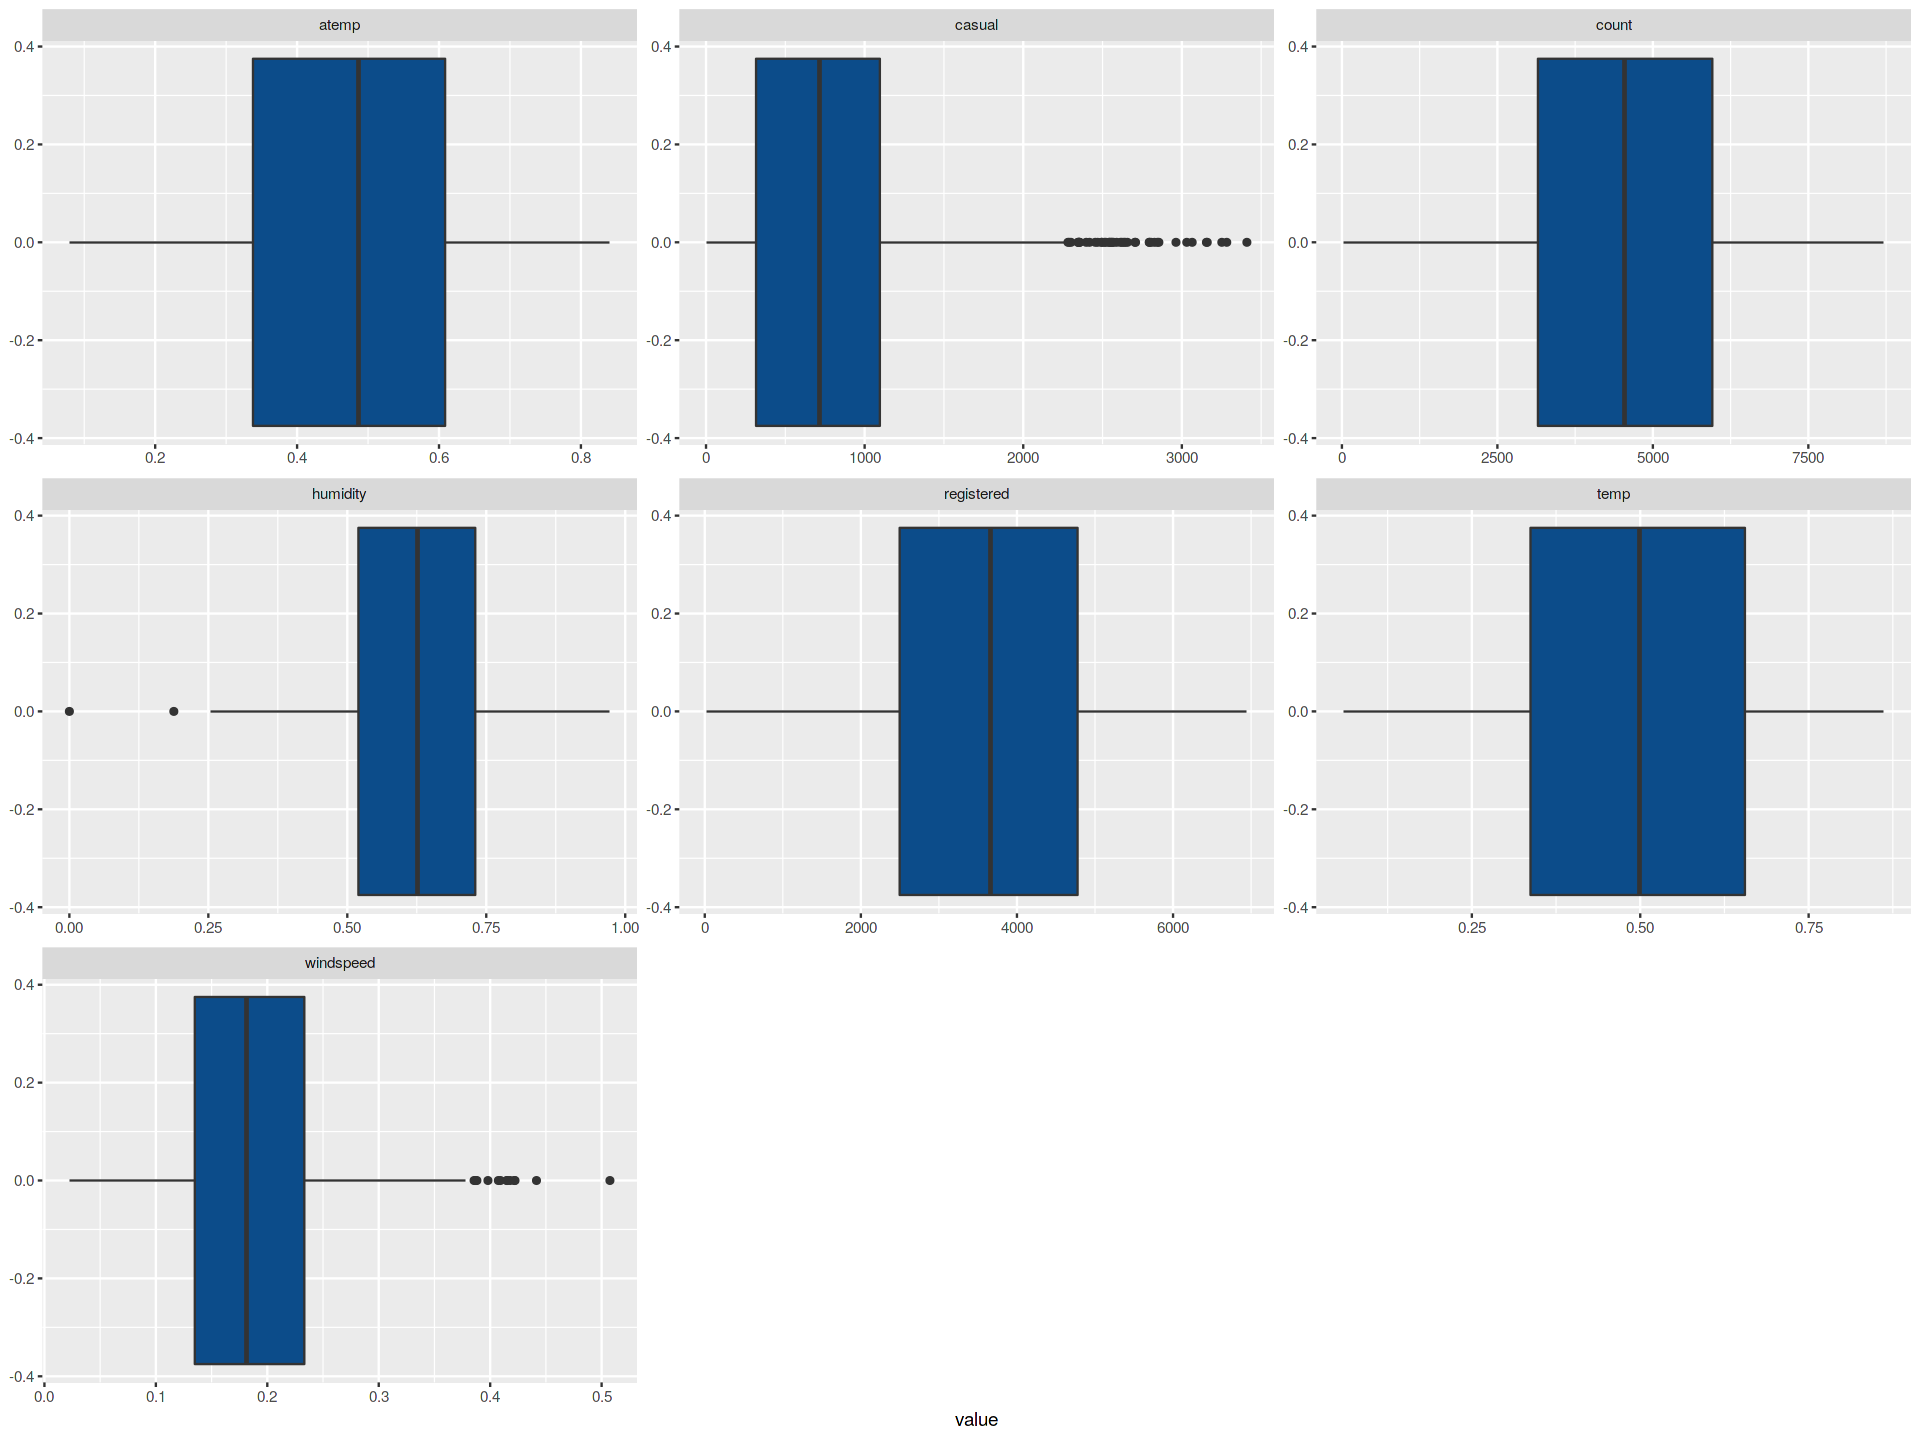

In [21]:
fig(16,12)
bike_rental %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_boxplot(bins = 30L, fill = "#0c4c8a")

In [22]:
# Outlier Removal
outlier_variables = c("humidity","windspeed")
for(i in outlier_variables){
  val = bike_rental[,i][bike_rental[,i] %in% boxplot.stats(bike_rental[,i])$out]
  print(length(val))
  bike_rental[,i][bike_rental[,i] %in% val] = NA
}


[1] 2
[1] 13


In [23]:
# Checking Missing data - after outlier
apply(bike_rental, 2, function(x) {sum(is.na(x))})


season       year      month    holiday    weekday workingday weathersit 
         0          0          0          0          0          0          0 
      temp      atemp   humidity  windspeed     casual registered      count 
         0          0          2         13          0          0          0

In [24]:
bike_rental = drop_na(bike_rental)

# Correlation analysis

In [25]:
library(corrplot)

corrplot 0.84 loaded



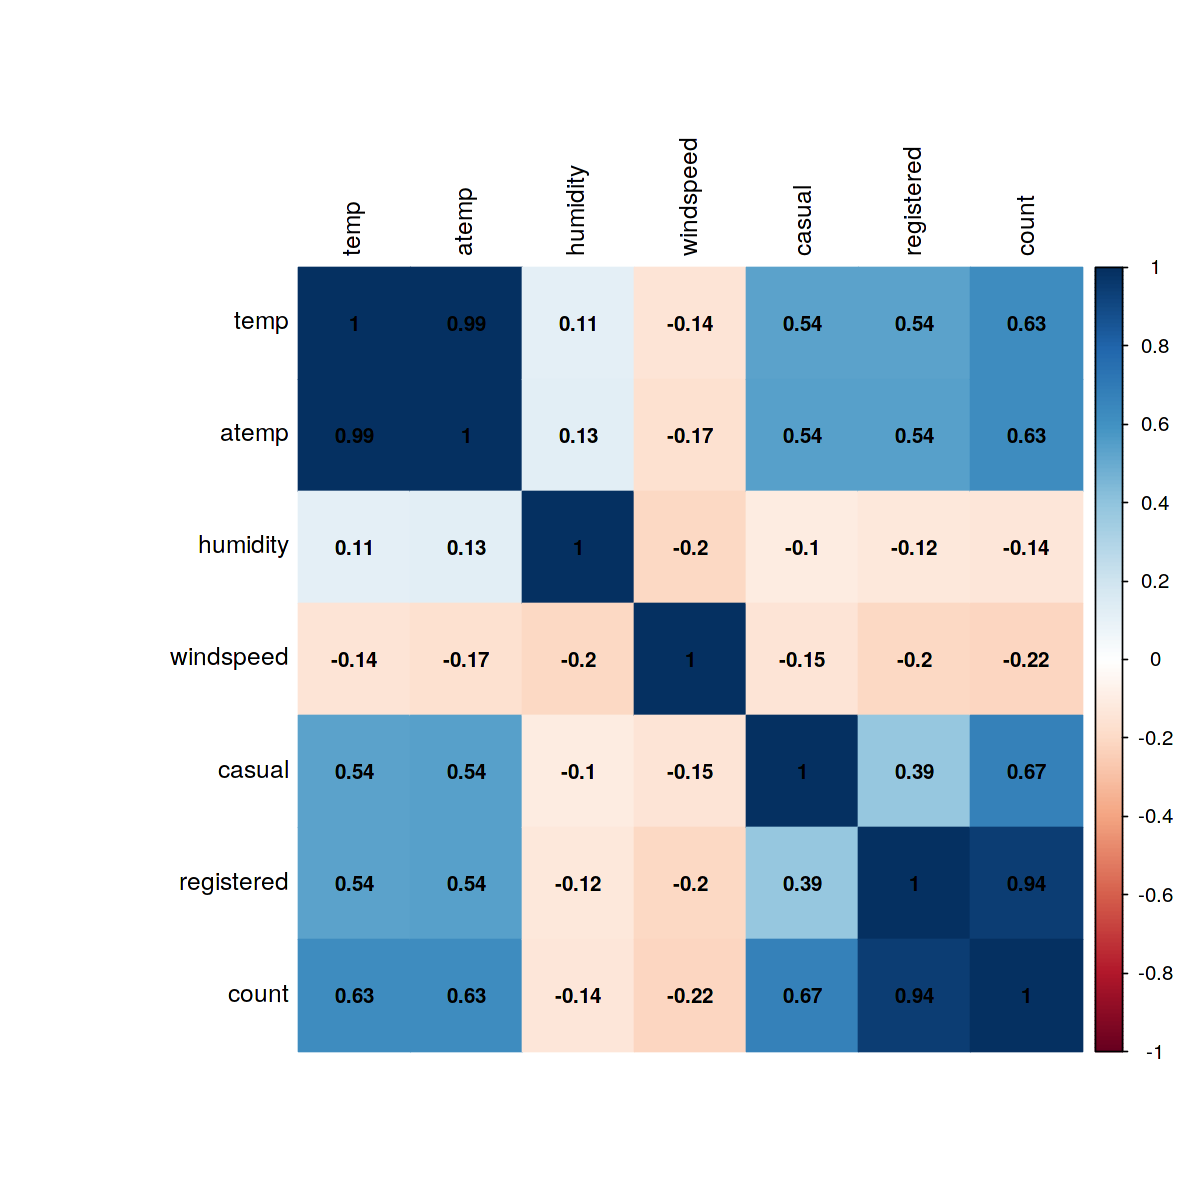

In [26]:
fig(10,10)
par(mfrow = c(1, 1))
num_vars <- names(bike_rental[,8:14])
numVarDataset <- bike_rental[, num_vars]
corr <- cor(numVarDataset)
corrplot(
  corr,
  method = "color",
  rect.col = "black",
  tl.col = "black",
  addCoef.col = "black",
  number.digits = 2,
  number.cex = 1,
  tl.cex = 1.2,
  cl.cex = 1,
)

In [27]:
install.packages("GoodmanKruskal")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



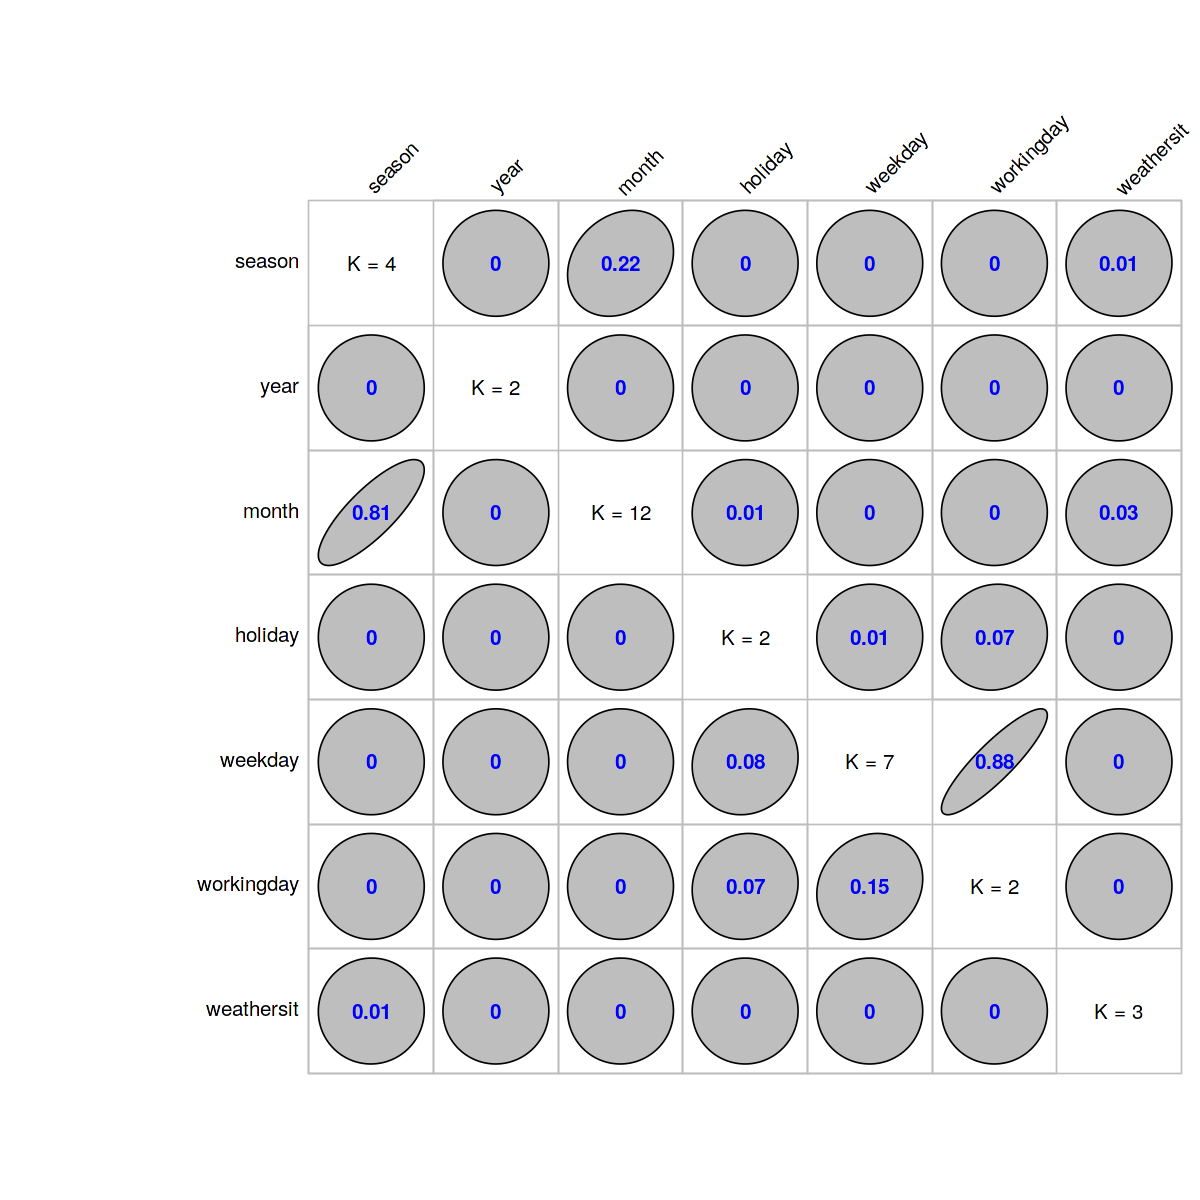

In [28]:
library("GoodmanKruskal")
fig(10,10)
factor_index = sapply(bike_rental,is.factor)
factor_data = bike_rental[,factor_index]
plot(GKtauDataframe( factor_data), corrColors = 'blue')

In [29]:
factor_index = sapply(bike_rental,is.factor)
factor_data = bike_rental[,factor_index]

for (i in 1:7)
{
  print(names(factor_data)[i])
  print(chisq.test(table(factor_data$season,factor_data[,i])))
}


[1] "season"

	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 2151, df = 9, p-value < 2.2e-16

[1] "year"

	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 0.027386, df = 3, p-value = 0.9988

[1] "month"

	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 1732.4, df = 33, p-value < 2.2e-16

[1] "holiday"

	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 1.6838, df = 3, p-value = 0.6406

[1] "weekday"

	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 0.52849, df = 18, p-value = 1

[1] "workingday"

	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 0.37014, df = 3, p-value = 0.9463

[1] "weathersit"


Warning message in chisq.test(table(factor_data$season, factor_data[, i])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(factor_data$season, factor_data[, i])
X-squared = 16.096, df = 6, p-value = 0.01325



In [30]:
bike_rental= subset(bike_rental,select=-(casual))
bike_rental= subset(bike_rental,select=-(registered))
bike_rental = subset(bike_rental, select = -(atemp))

In [31]:
names(bike_rental)

[1] "season"     "year"       "month"      "holiday"    "weekday"   
 [6] "workingday" "weathersit" "temp"       "humidity"   "windspeed" 
[11] "count"

In [32]:
library(caTools)
library(rcompanion)
library(mlr)
library(MASS)
library(Metrics)
library(randomForest)

Loading required package: ParamHelpers

Warning message:
“replacing previous import ‘data.table:::=’ by ‘ggplot2:::=’ when loading ‘mlr’”
'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).


Attaching package: ‘mlr’


The following object is masked from ‘package:caret’:

    train



Attaching package: ‘Metrics’


The following object is masked from ‘package:rcompanion’:

    accuracy


The following objects are masked from ‘package:caret’:

    precision, recall


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [33]:
set.seed(654)
split <- sample.split(bike_rental$count, SplitRatio = 0.70)
training_set <- subset(bike_rental, split == TRUE)
test_set <- subset(bike_rental, split == FALSE)

### Linear Model

In [34]:
model_lr <- lm(count ~ ., data = training_set)

In [35]:
summary(model_lr)


Call:
lm(formula = count ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-4056.0  -339.0    84.6   452.1  2606.4 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1474.06     295.84   4.983 8.81e-07 ***
season2       755.53     215.25   3.510 0.000491 ***
season3       763.96     251.07   3.043 0.002474 ** 
season4      1497.33     218.59   6.850 2.31e-11 ***
year1        2020.45      70.39  28.702  < 2e-16 ***
month2        293.31     174.32   1.683 0.093126 .  
month3        612.93     203.88   3.006 0.002784 ** 
month4        810.74     303.56   2.671 0.007828 ** 
month5        801.25     324.39   2.470 0.013863 *  
month6        584.60     345.84   1.690 0.091615 .  
month7        102.39     383.45   0.267 0.789565    
month8        379.53     370.92   1.023 0.306723    
month9       1090.85     320.27   3.406 0.000715 ***
month10       721.81     295.33   2.444 0.014887 *  
mon

In [36]:
# Apply prediction on test set
test_prediction <- predict(model_lr, newdata = test_set)

Warning message in predict.lm(model_lr, newdata = test_set):
“prediction from a rank-deficient fit may be misleading”


In [37]:
summary(test_prediction)
print("summary of actual count values")
summary(test_set$count)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1311    3483    4809    4602    6033    7887 

[1] "summary of actual count values"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    506    3214    4582    4548    6049    8395 

In [38]:
cat("r-squared :", R2(test_set$count,test_prediction))

r-squared : 0.8314462

In [39]:
regr.eval(test_set$count,test_prediction)

mae          mse         rmse         mape 
6.114757e+02 6.721375e+05 8.198399e+02 2.025565e-01

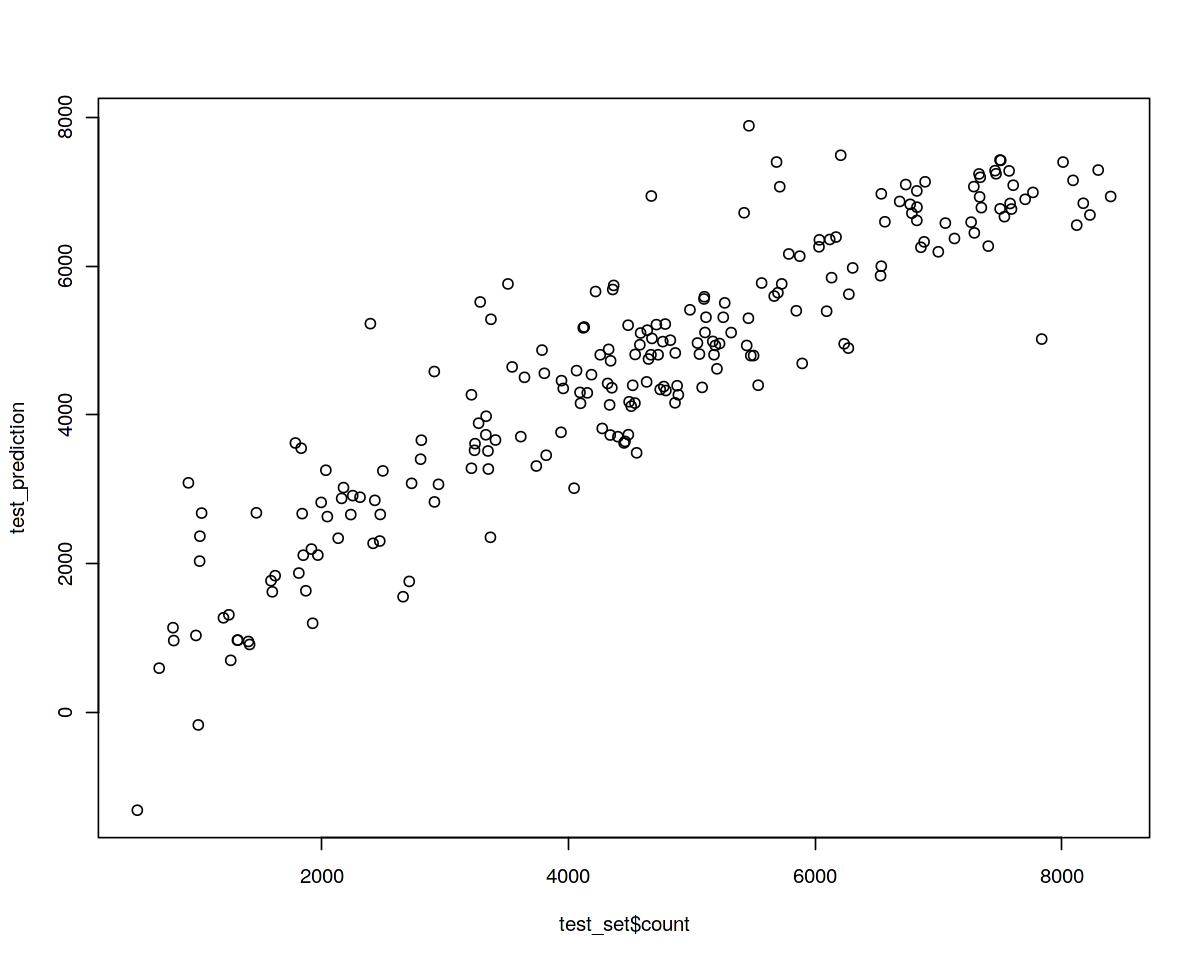

In [40]:
fig(10,8)
plot(test_set$count ,test_prediction)

### Decision Tree Model 

In [41]:
model_dt = rpart(count ~ ., data=training_set, method = "anova")


In [42]:
# summary on trained model
summary(model_dt)

#Prediction on test_data
predictions_dt = predict(model_dt, test_set)

Call:
rpart(formula = count ~ ., data = training_set, method = "anova")
  n= 501 

           CP nsplit rel error    xerror       xstd
1  0.39443434      0 1.0000000 1.0024589 0.04933959
2  0.21610692      1 0.6055657 0.6530399 0.03745156
3  0.07378156      2 0.3894587 0.4353938 0.03832808
4  0.03818358      3 0.3156772 0.3427316 0.03267818
5  0.03644793      4 0.2774936 0.3153362 0.03281648
6  0.02295653      5 0.2410457 0.2751581 0.03182267
7  0.01512305      6 0.2180891 0.2764746 0.03200658
8  0.01184514      7 0.2029661 0.2839921 0.03484108
9  0.01082331      8 0.1911209 0.2800103 0.03509736
10 0.01000000      9 0.1802976 0.2661883 0.03427967

Variable importance
      temp      month       year     season   humidity  windspeed    weekday 
        29         24         18         17          5          3          2 
workingday 
         1 

Node number 1: 501 observations,    complexity param=0.3944343
  mean=4526.371, MSE=3630992 
  left son=2 (202 obs) right son=3 (299 obs)
  Pri

In [43]:
printcp(model_dt)


Regression tree:
rpart(formula = count ~ ., data = training_set, method = "anova")

Variables actually used in tree construction:
[1] humidity  month     season    temp      windspeed year     

Root node error: 1819126781/501 = 3630992

n= 501 

         CP nsplit rel error  xerror     xstd
1  0.394434      0   1.00000 1.00246 0.049340
2  0.216107      1   0.60557 0.65304 0.037452
3  0.073782      2   0.38946 0.43539 0.038328
4  0.038184      3   0.31568 0.34273 0.032678
5  0.036448      4   0.27749 0.31534 0.032816
6  0.022957      5   0.24105 0.27516 0.031823
7  0.015123      6   0.21809 0.27647 0.032007
8  0.011845      7   0.20297 0.28399 0.034841
9  0.010823      8   0.19112 0.28001 0.035097
10 0.010000      9   0.18030 0.26619 0.034280


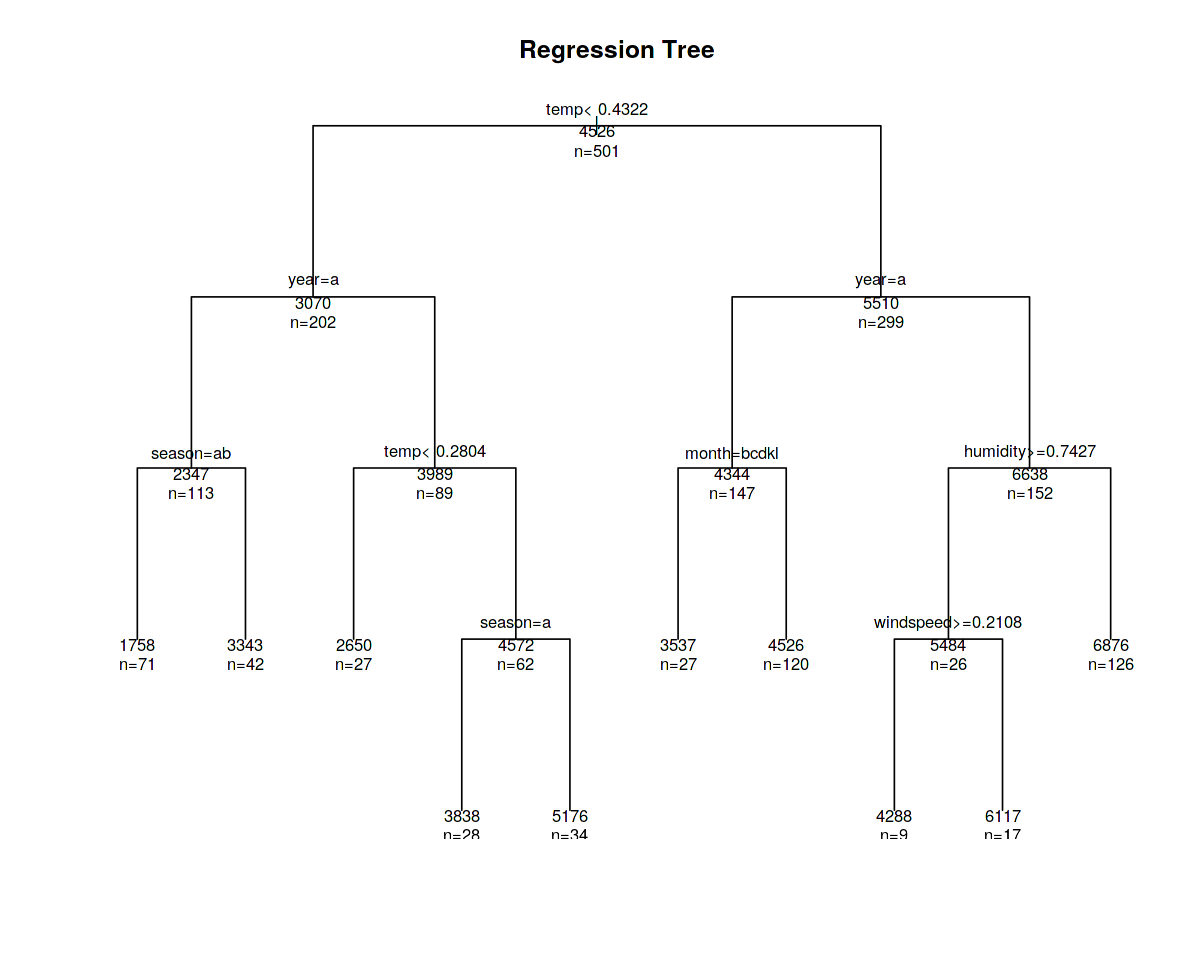

In [44]:
plot(model_dt, uniform=TRUE,
   main="Regression Tree  ")
text(model_dt, use.n=TRUE, all=TRUE, cex=.8)

In [45]:
summary(predictions_dt)
print("summary of actual count values")
summary(test_set$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1758    3537    4526    4683    6876    6876 

[1] "summary of actual count values"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    506    3214    4582    4548    6049    8395 

In [46]:
cat("r-squared :", R2(test_set$count,predictions_dt))

r-squared : 0.7920457

In [47]:
regr.eval(test_set$count,predictions_dt)

mae          mse         rmse         mape 
6.824364e+02 8.443009e+05 9.188585e+02 2.419357e-01

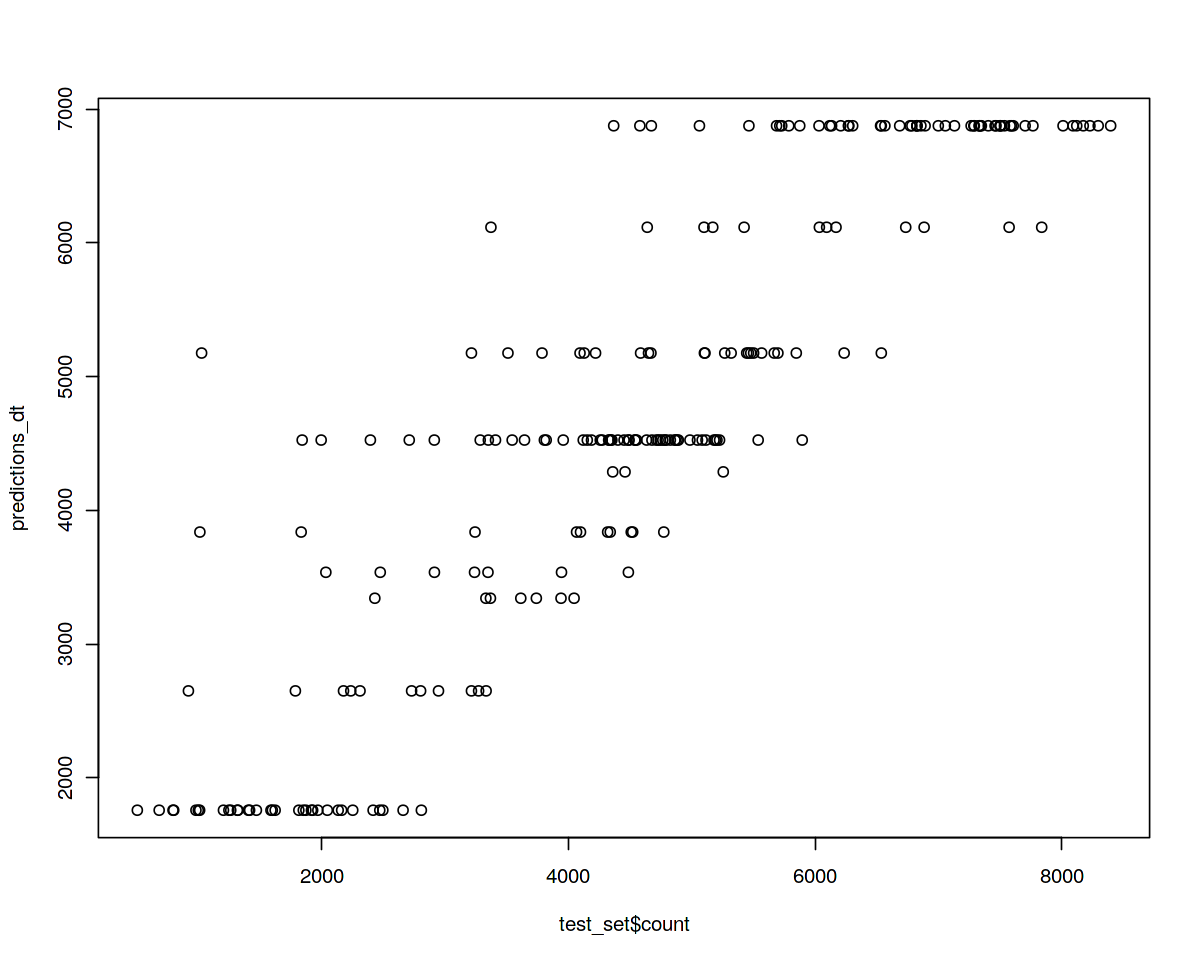

In [48]:
plot(test_set$count ,predictions_dt)

### Random Forest

In [49]:
model_rf <- randomForest(count ~.,
                           data = training_set, importance = TRUE)
print(model_rf)


Call:
 randomForest(formula = count ~ ., data = training_set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 466703.3
                    % Var explained: 87.15


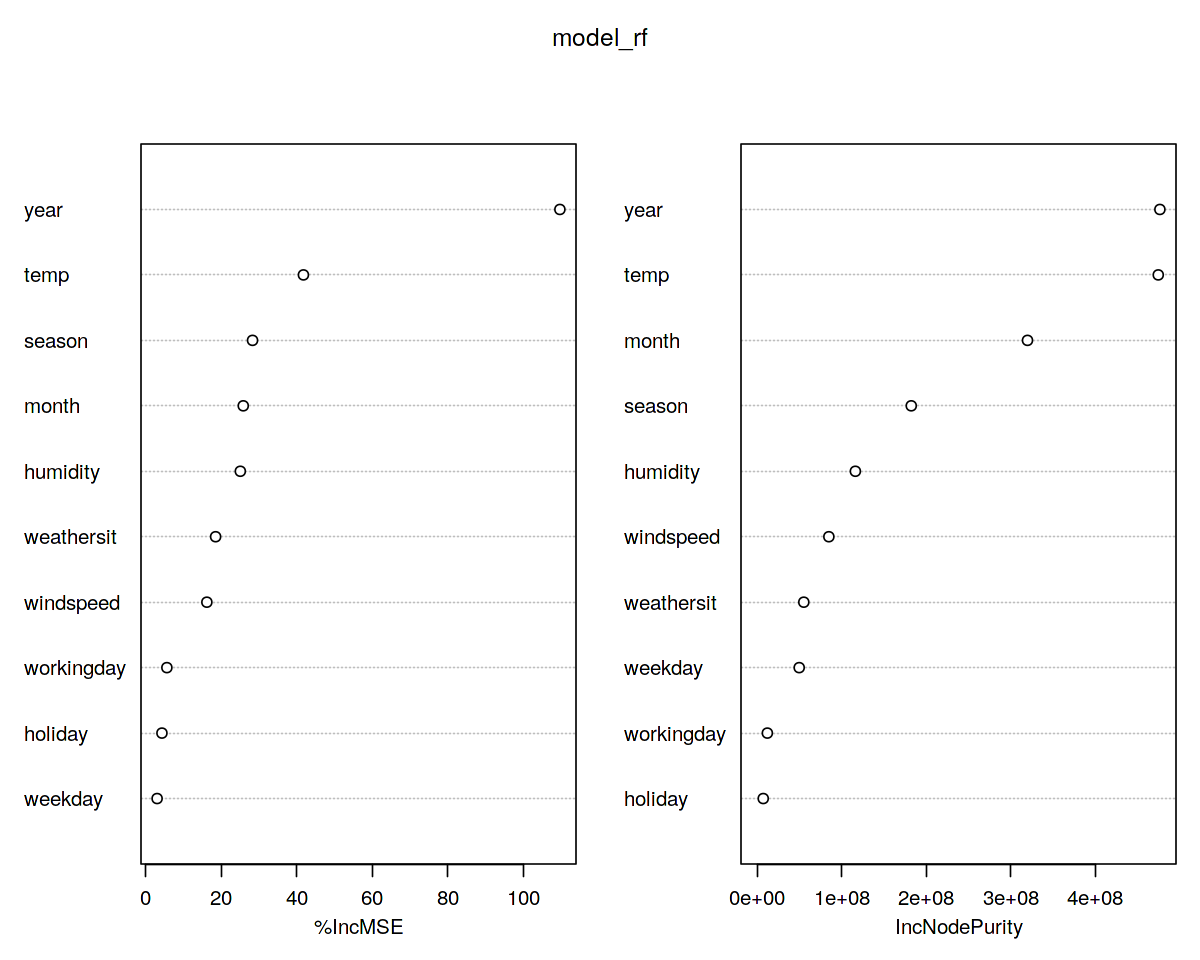

In [50]:
varImpPlot(model_rf)

In [51]:
rf_prediction <- predict(model_rf,test_set)

In [52]:
cat("r-squared :", R2(test_set$count,rf_prediction))

r-squared : 0.8903481

In [53]:
regr.eval(test_set$count,rf_prediction)

mae          mse         rmse         mape 
5.125049e+02 4.946781e+05 7.033336e+02 1.875750e-01

In [67]:
tuned_randomForest <-  randomForest(count ~.,
                                    data = training_set,ntree = 30, mtry = 6, importance = TRUE)
tuned_randomForest


Call:
 randomForest(formula = count ~ ., data = training_set, ntree = 30,      mtry = 6, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 30
No. of variables tried at each split: 6

          Mean of squared residuals: 543467.6
                    % Var explained: 85.03

In [68]:
rf1_prediction <- predict(tuned_randomForest,test_set)


In [69]:
cat("r-squared :", R2(test_set$count,rf1_prediction))

r-squared : 0.8806656

In [70]:
regr.eval(test_set$count,rf1_prediction)

mae          mse         rmse         mape 
5.056590e+02 4.959417e+05 7.042313e+02 1.785458e-01

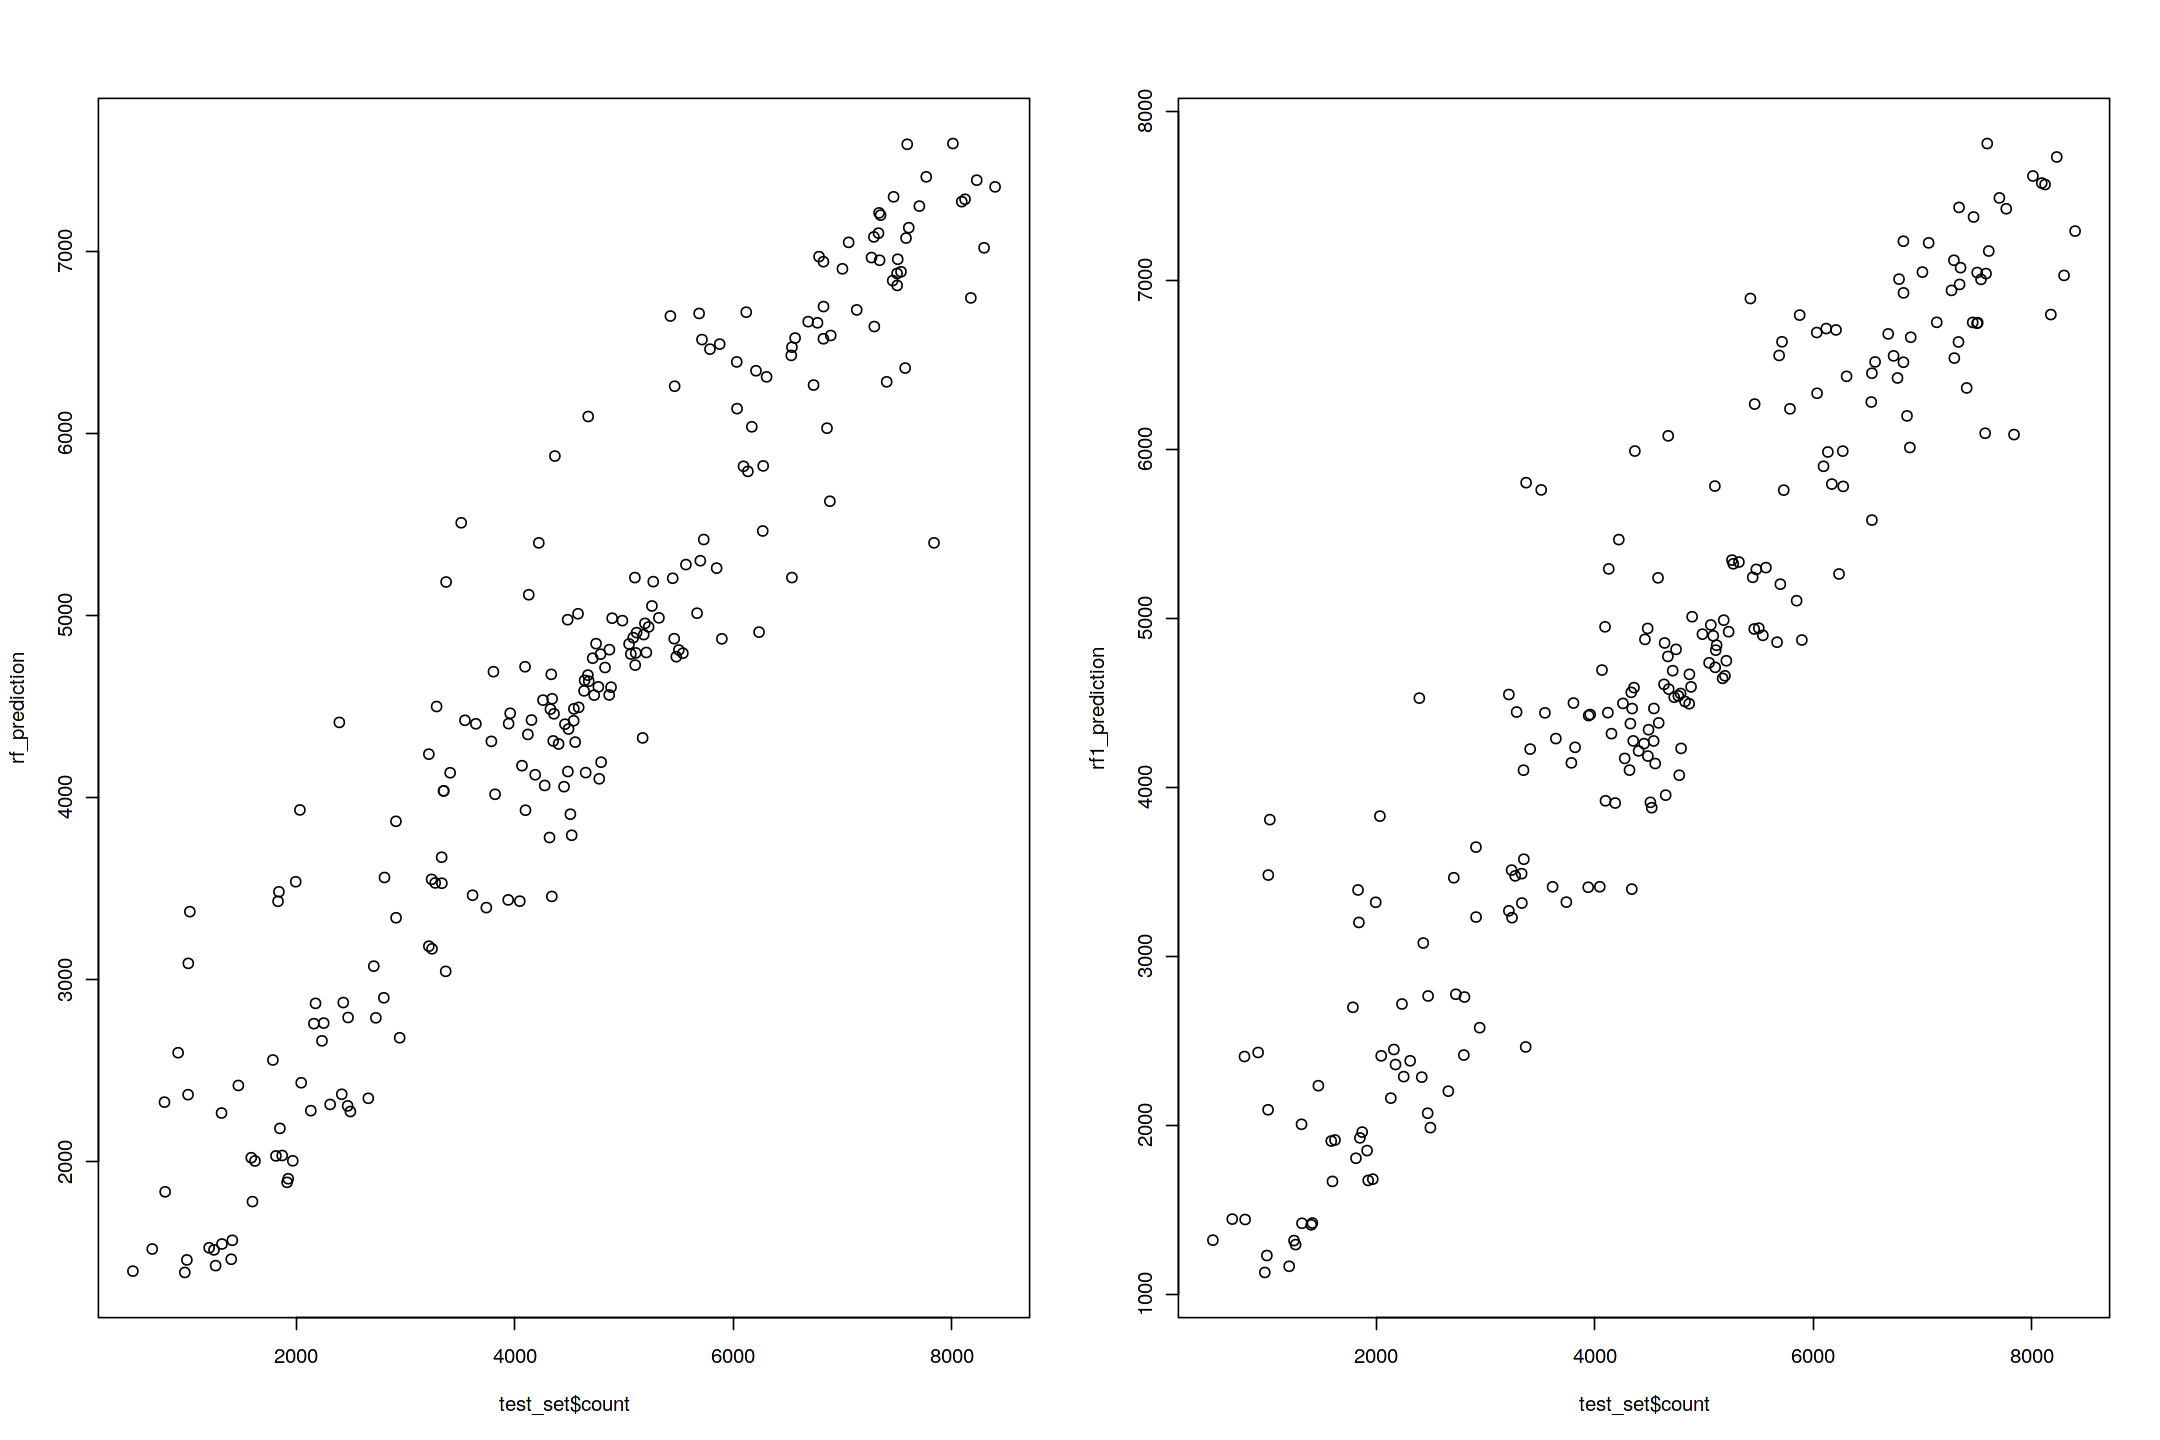

In [76]:
fig(18,9)
par(mfrow=c(1,2))
plot(test_set$count ,rf_prediction)
plot(test_set$count ,rf1_prediction)